<a href="https://colab.research.google.com/github/n160954/Data-Mining/blob/main/DataPreprocessing(Assignment2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'/IBRD_Balance_Sheet__FY2010 - IBRD_Balance_Sheet__FY2010.csv')
df.head()

,Category,Line Item,Fiscal Year,"Amount (US$, Millions)"
0,Assets,Due from Banks - Unrestricted currencies,2010,1581.0
1,Assets,Due from Banks - Unrestricted currencies,2009,2380.0
2,Assets,Due from Banks - Currencies subject to restric...,2010,222.0
3,Assets,Due from Banks - Currencies subject to restric...,2009,664.0
4,Assets,Investments - Trading,2010,36012.0


In [3]:
df.value_counts()

Category     Line Item                                                                                                                                   Fiscal Year  Amount (US$, Millions)
Liabilities  Securities Sold under Repurchase Agreements, Securities Lent under Securities Lending Agreements, and Payable for Cash Collateral Received  2010          998.0                    1
Assets       Securities purchased under resale agreements                                                                                                2009          33.0                     1
             Receivables to maintain value of currency holdings on account of subscribed capital                                                         2009          176.0                    1
             Other Receivables -Receivables from investment securities traded                                                                            2010          47.0                     1
                                   

#2. Write python code to count number of missing values, replace missing values with median of that variable,  find the outlier/noisy data, and replace it with last value of the corresponding variable

In [4]:
df.isnull().sum()

Category                  0
Line Item                 0
Fiscal Year               0
Amount (US$, Millions)    1
dtype: int64

In [5]:
median=df["Amount (US$, Millions)"].median()
df['Amount (US$, Millions)'].fillna(median,inplace=True)
df.head()

,Category,Line Item,Fiscal Year,"Amount (US$, Millions)"
0,Assets,Due from Banks - Unrestricted currencies,2010,1581.0
1,Assets,Due from Banks - Unrestricted currencies,2009,2380.0
2,Assets,Due from Banks - Currencies subject to restric...,2010,222.0
3,Assets,Due from Banks - Currencies subject to restric...,2009,664.0
4,Assets,Investments - Trading,2010,36012.0


In [6]:
df.isnull().sum()

Category                  0
Line Item                 0
Fiscal Year               0
Amount (US$, Millions)    0
dtype: int64

In [7]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [8]:
df.describe()

,Fiscal Year,"Amount (US$, Millions)"
count,62.000000,62.000000
mean,2009.500000,18039.370968
std,0.504082,33181.875716
min,2009.000000,-3043.000000
25%,2009.000000,627.500000
50%,2009.500000,1581.000000
75%,2010.000000,18258.500000
max,2010.000000,128577.000000


In [9]:
Q1=df['Amount (US$, Millions)'].quantile(0.25)
Q3=df['Amount (US$, Millions)'].quantile(0.75)
Q1,Q3

(627.5, 18258.5)

In [10]:
IQR=Q3-Q1
IQR

17631.0

In [11]:
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
lower_limit,upper_limit

(-25819.0, 44705.0)

# #These are the outliers

In [12]:
df[(df['Amount (US$, Millions)']<lower_limit)|(df['Amount (US$, Millions)']>upper_limit)]

,Category,Line Item,Fiscal Year,"Amount (US$, Millions)"
14,Assets,Derivative Assets - Borrowings,2010,87457.0
15,Assets,Derivative Assets - Borrowings,2009,82793.0
24,Assets,Loans Outstanding - Net loans outstanding,2010,118104.0
25,Assets,Loans Outstanding - Net loans outstanding,2009,103657.0
32,Liabilities,Borrowings,2010,128577.0
33,Liabilities,Borrowings,2009,110040.0
40,Liabilities,Derivative Liabilities - Borrowings,2010,78655.0
41,Liabilities,Derivative Liabilities - Borrowings,2009,76321.0


#Removing outliers

In [13]:
df2_no_outlier=df[(df['Amount (US$, Millions)']>lower_limit)&(df['Amount (US$, Millions)']<upper_limit)]
df2_no_outlier

,Category,Line Item,Fiscal Year,"Amount (US$, Millions)"
0,Assets,Due from Banks - Unrestricted currencies,2010,1581.0
1,Assets,Due from Banks - Unrestricted currencies,2009,2380.0
2,Assets,Due from Banks - Currencies subject to restric...,2010,222.0
3,Assets,Due from Banks - Currencies subject to restric...,2009,664.0
4,Assets,Investments - Trading,2010,36012.0
5,Assets,Investments - Trading,2009,41012.0
6,Assets,Securities purchased under resale agreements,2010,289.0
7,Assets,Securities purchased under resale agreements,2009,33.0
8,Assets,"Nonnegotiable, nonintrest-bearing demand oblig...",2010,1123.0
9,Assets,"Nonnegotiable, nonintrest-bearing demand oblig...",2009,1202.0


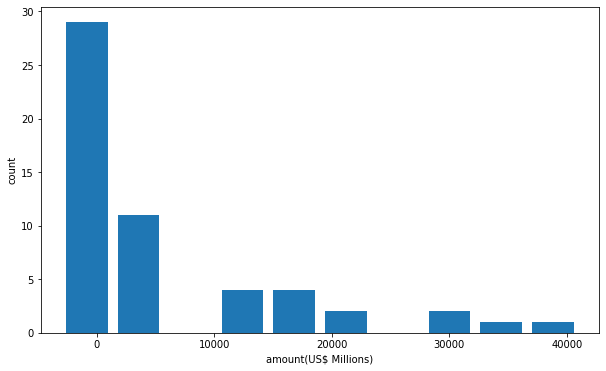

In [14]:
plt.hist(df2_no_outlier['Amount (US$, Millions)'],bins=10,rwidth=0.8)
plt.xlabel('amount(US$ Millions)')
plt.ylabel('count')
plt.show()

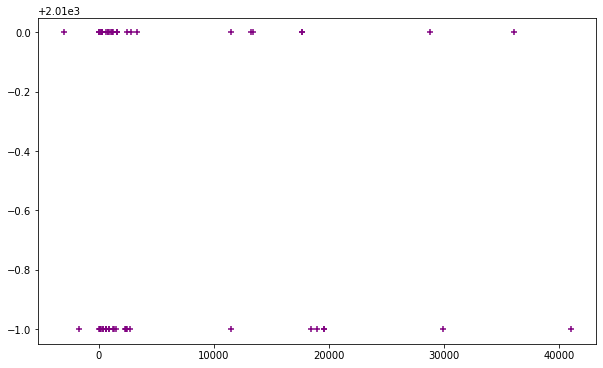

In [15]:
plt.scatter(df2_no_outlier['Amount (US$, Millions)'],df2_no_outlier['Fiscal Year'],marker='+',color='purple')

#1. Write python code for Entropy based discretization, given the data set "BankAssests"

In [16]:
df['dataDiscretization']=pd.cut(df['Amount (US$, Millions)'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])
df

,Category,Line Item,Fiscal Year,"Amount (US$, Millions)",dataDiscretization
0,Assets,Due from Banks - Unrestricted currencies,2010,1581.0,Poor
1,Assets,Due from Banks - Unrestricted currencies,2009,2380.0,Poor
2,Assets,Due from Banks - Currencies subject to restric...,2010,222.0,Poor
3,Assets,Due from Banks - Currencies subject to restric...,2009,664.0,Poor
4,Assets,Investments - Trading,2010,36012.0,Below_average
...,...,...,...,...,...
57,Equity,Deferred Amounts to Maintain Value of Currency...,2009,359.0,Poor
58,Equity,Retained Earnings,2010,28793.0,Below_average
59,Equity,Retained Earnings,2009,29870.0,Below_average
60,Equity,Accumulated Other Comorehensive Loss,2010,-3043.0,Poor


#3. Write python code for stratified sampling, get 30 % of sample from each category from the  Dataset "Wheather_Hyd".

In [17]:
df1=pd.read_csv(r'/Hyderabad_June_weather.csv')
df1.head()
df1.value_counts()

Temp_high  Temp_avg  Temp_low  Dew_High  Dew_Avg  Dew_low  Hum_high  Hum_avg  Hum_low  Sea_high  Sea_avg  Sea_low  Visib_high  Visib_avg  Visib_low  Wind_high  Wind_avg  Preci_High  Preci_sum  event                month  year
45         37        28        18        9        5        39        15       7        1009      1004     997      10          6          3          21         10        -           0.00       Normal               June   2013    1
35         30        23        21        17       13       88        45       26       1008      1006     1003     8           5          3          14         13        -           0.00       Rain , Thunderstorm  June   2010    1
37         31        24        22        20       17       84        57       28       1014      1011     1005     10          4          3          16         6         -           0.00       Rain , Thunderstorm  June   2015    1
                                         19       16       74        46       32 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le_event=LabelEncoder()
df1['event_n']=le_event.fit_transform(df1['event'])

In [20]:
df1.head()

,Temp_high,Temp_avg,Temp_low,Dew_High,Dew_Avg,Dew_low,Hum_high,Hum_avg,Hum_low,Sea_high,Sea_avg,Sea_low,Visib_high,Visib_avg,Visib_low,Wind_high,Wind_avg,Preci_High,Preci_sum,event,month,year,event_n
0,39,33,27,21,16,10,70,40,17,1012,1009,1007,8,5,3,24,16,-,0.0,"Rain , Thunderstorm",June,2010,2
1,36,31,26,17,14,12,57,35,25,1014,1010,1008,5,5,3,24,16,-,0.0,Normal,June,2010,0
2,38,32,27,17,14,11,54,34,20,1014,1012,1008,7,6,3,24,13,-,0.0,Normal,June,2010,0
3,38,33,29,18,14,10,48,30,18,1013,1010,1008,8,6,3,21,16,-,0.0,Normal,June,2010,0
4,37,33,30,15,13,11,37,28,21,1012,1009,1006,8,7,3,26,16,-,0.0,Normal,June,2010,0


In [21]:
X=df1.drop(['event','event_n'],axis='columns')
y=df1['event_n']
y.value_counts()

0    168
2     38
1     27
Name: event_n, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15,stratify=y)
y_test.value_counts()

0    51
2    11
1     8
Name: event_n, dtype: int64

#4. Write python code to apply data transformation to whichever attributes needed for, and apply PCA for dimenstinality reduction on the  Dataset "Wheather_Hyd".


In [23]:
df3=df1.copy()
df3.drop(['Preci_High','Preci_sum','event','month','year','event_n'],axis=1,inplace=True)
df3.head()

,Temp_high,Temp_avg,Temp_low,Dew_High,Dew_Avg,Dew_low,Hum_high,Hum_avg,Hum_low,Sea_high,Sea_avg,Sea_low,Visib_high,Visib_avg,Visib_low,Wind_high,Wind_avg
0,39,33,27,21,16,10,70,40,17,1012,1009,1007,8,5,3,24,16
1,36,31,26,17,14,12,57,35,25,1014,1010,1008,5,5,3,24,16
2,38,32,27,17,14,11,54,34,20,1014,1012,1008,7,6,3,24,13
3,38,33,29,18,14,10,48,30,18,1013,1010,1008,8,6,3,21,16
4,37,33,30,15,13,11,37,28,21,1012,1009,1006,8,7,3,26,16


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df3)
scaled_data

array([[ 0.43232646,  0.45390255,  0.38011059, ..., -0.15411083,
         0.26675139,  1.62651053],
       [-0.29063095, -0.19492747, -0.04364906, ..., -0.15411083,
         0.26675139,  1.62651053],
       [ 0.19134066,  0.12948754,  0.38011059, ..., -0.15411083,
         0.26675139,  0.91770077],
       ...,
       [-2.21851737, -2.14141753, -1.73868769, ..., -0.15411083,
        -0.06776462, -0.73618868],
       [-1.25457416, -1.1681725 , -1.31492803, ..., -0.15411083,
        -0.06776462,  0.44516092],
       [-1.01358836, -1.1681725 , -1.31492803, ..., -0.15411083,
        -0.40228062,  0.44516092]])

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca=PCA(n_components=2)

In [28]:
x_pca=pca.fit_transform(scaled_data)

#Reducing 17 columns into 2 columns

In [29]:
scaled_data.shape

(233, 17)

In [30]:
x_pca.shape

(233, 2)

In [31]:
scaled_data

array([[ 0.43232646,  0.45390255,  0.38011059, ..., -0.15411083,
         0.26675139,  1.62651053],
       [-0.29063095, -0.19492747, -0.04364906, ..., -0.15411083,
         0.26675139,  1.62651053],
       [ 0.19134066,  0.12948754,  0.38011059, ..., -0.15411083,
         0.26675139,  0.91770077],
       ...,
       [-2.21851737, -2.14141753, -1.73868769, ..., -0.15411083,
        -0.06776462, -0.73618868],
       [-1.25457416, -1.1681725 , -1.31492803, ..., -0.15411083,
        -0.06776462,  0.44516092],
       [-1.01358836, -1.1681725 , -1.31492803, ..., -0.15411083,
        -0.40228062,  0.44516092]])

In [32]:
x_pca

array([[-0.32569205,  1.72224404],
       [ 0.22810124,  3.45807928],
       [-0.85188783,  3.30993307],
       [-1.57605991,  2.69873497],
       [-2.274126  ,  2.45297224],
       [-1.49364485,  2.31761271],
       [-1.72201312,  1.82571022],
       [-1.98353196,  2.30711729],
       [ 1.43256948,  0.48044267],
       [ 1.49609225,  0.10029479],
       [ 1.6687424 ,  1.16283905],
       [ 2.99501719, -1.06996959],
       [ 3.67209283,  0.0379306 ],
       [ 3.62359235,  1.23915011],
       [ 2.64947635,  1.96332285],
       [ 2.99222735,  2.22086478],
       [ 2.40675656,  2.24251025],
       [ 3.42005625,  1.34751212],
       [ 3.82646139,  1.46562855],
       [ 5.56183146,  2.62690687],
       [ 3.76443729,  2.54575934],
       [ 1.62357018,  2.5660105 ],
       [ 2.79334332,  1.07633831],
       [ 3.19953811,  1.46230009],
       [ 2.35272009,  0.20675139],
       [ 1.52792556,  0.41921571],
       [ 1.39719139,  1.00367485],
       [-0.39702617,  1.9248761 ],
       [ 0.59999223,

No handles with labels found to put in legend.


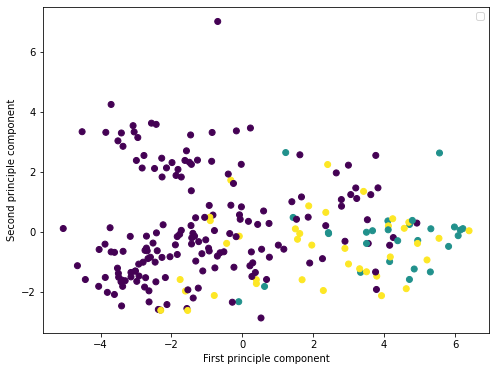

In [33]:

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['event_n'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.legend()

#5. Write python code to handle the noisy data given below, using binning method (smooth by means, median, boundary), and kmean clustering.

  data=[ 2,5,10,20,40,25,30,60,40,50,55, 15,35,125,45,-85]

In [34]:
data=[ 2,5,10,20,40,25,30,60,40,50,55, 15,35,125,45,-85]
df4=pd.DataFrame(data,columns=['Data'])
df4.head()

,Data
0,2
1,5
2,10
3,20
4,40


In [35]:
df4.sort_values(by=['Data'],inplace=True)
df4.head()

,Data
15,-85
0,2
1,5
2,10
11,15


In [36]:
data=np.sort(data)
print(data)

[-85   2   5  10  15  20  25  30  35  40  40  45  50  55  60 125]


#Binning by mean:




*   (-85+2+5+10)/4        ---> -17.
*   (15+20+25+30)/4       ---> 22.5


*   (35+40+40+45)/4       ---> 40.0
*   (50+55+60+125)/4      ---> 72.5






In [37]:
b1=np.zeros((4,4)) 


In [38]:
for i in range (0,16,4): 
  k=int(i/4) 
  mean=(data[i] + data[i+1] + data[i+2] +data[i+3])/4
  for j in range(4): 
    b1[k,j]=mean 

print("-----------------Mean Bin:----------------- \n",b1)

-----------------Mean Bin:----------------- 
 [[-17.  -17.  -17.  -17. ]
 [ 22.5  22.5  22.5  22.5]
 [ 40.   40.   40.   40. ]
 [ 72.5  72.5  72.5  72.5]]


#Median Bin

In [39]:
for i in range (0,16,4): 
  k=int(i/4) 
  for j in range (4): 
    b1[k,j]=data[i+1] 
print("-----------------Median Bin :----------------- \n",b1)

-----------------Median Bin :----------------- 
 [[ 2.  2.  2.  2.]
 [20. 20. 20. 20.]
 [40. 40. 40. 40.]
 [55. 55. 55. 55.]]


#Boundary Bin


*   [-85   2   5  10  15  20  25  30  35  40  40  45  50  55  60 125]



In [40]:
for i in range (0,16,4): 
  k=int(i/4) 
  for j in range (4): 
    if (data[i+j]-data[i]) < (data[i+3]-data[i+j]): 
      b1[k,j]=data[i] 
    else: 
      b1[k,j]=data[i+3]   

print("-----------------Boundary Bin:----------------- \n",b1)

-----------------Boundary Bin:----------------- 
 [[-85.  10.  10.  10.]
 [ 15.  15.  30.  30.]
 [ 35.  45.  45.  45.]
 [ 50.  50.  50. 125.]]


#KMeans Clustering:

In [41]:
from sklearn.cluster import KMeans

In [42]:
data

array([-85,   2,   5,  10,  15,  20,  25,  30,  35,  40,  40,  45,  50,
        55,  60, 125])

In [44]:
kmeans=KMeans(n_clusters=4).fit(data.reshape(-1,1))
kmeans.predict(data.reshape(-1,1))

array([1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [45]:
kmeans.cluster_centers_

array([[ 44.375     ],
       [-85.        ],
       [125.        ],
       [ 12.83333333]])